In [1]:
import numpy as np
import pandas as pd

In [2]:
DATASET = "adult"
MODEL = "imli"
ZOOM_ID = 0
ATTRIBUTE = ' training_time' # ' training_time', ' rule_size', ' val_accuracy'

In [3]:
working_dir = "./" + DATASET + "/{}/".format(MODEL)
df = pd.read_csv(working_dir + "log-{}-0.csv".format(MODEL))
df['holdout_id'] = 0

for i in range(1, 10):
    tmp = pd.read_csv(working_dir + "log-{}-%d.csv".format(MODEL) % i)
    tmp['holdout_id'] = i
    df = df.append(tmp)

In [4]:
display(df.tail())

,lamda,n_clause,rule_type,id_cv,train_size,val_size,n_partitions,real_partition_size,n_features,training_time,val_accuracy,rule_size,rule,classification_report_train,classification_report_val,holdout_id
595,10,3,DNF,5,26375,2930,206,[128; 129],296,898.322449,0.747440,88,[X3 != 1 AND X3 != 4 AND X3 != 5 AND X3 != 8 A...,{'0': {'precision': 0.8324078243033669; 'recal...,{'0': {'precision': 0.824945295404814; 'recall...,9
596,10,3,DNF,6,26375,2930,206,[128; 129],296,909.945433,0.781911,90,[X0 >= 43.500000 AND X1 != 2 AND X1 != 6 AND X...,{'0': {'precision': 0.8443934833500549; 'recal...,{'0': {'precision': 0.8444830582102519; 'recal...,9
597,10,3,DNF,7,26375,2930,206,[128; 129],296,922.246929,0.746758,88,[X0 >= 27.500000 AND X1 != 1 AND X1 != 2 AND X...,{'0': {'precision': 0.8490984028851107; 'recal...,{'0': {'precision': 0.8479587048334115; 'recal...,9
598,10,3,DNF,8,26375,2930,206,[128; 129],296,901.424567,0.717747,76,[X0 >= 23.500000 AND X1 != 0 AND X1 != 1 AND X...,{'0': {'precision': 0.8696882183061236; 'recal...,{'0': {'precision': 0.8745308310991957; 'recal...,9
599,10,3,DNF,9,26375,2930,206,[128; 129],296,898.409508,0.747782,86,[X0 >= 35.500000 AND X1 != 0 AND X1 != 2 AND X...,{'0': {'precision': 0.8421134020618557; 'recal...,{'0': {'precision': 0.8448676265675801; 'recal...,9


In [5]:
def extract_accuracy(clf):
    clf_comma = clf.replace(';', ',')
    clf_obj = eval(clf_comma)
    return clf_obj['accuracy']

df[' train_accuracy'] = df[' classification_report_train'].apply(extract_accuracy)

In [6]:
display(df.columns)
display(df.shape)

Index(['lamda', ' n_clause', ' rule_type', ' id_cv', ' train_size',
       ' val_size', ' n_partitions', ' real_partition_size', ' n_features',
       ' training_time', ' val_accuracy', ' rule_size', ' rule',
       ' classification_report_train', ' classification_report_val',
       'holdout_id', ' train_accuracy'],
      dtype='object')

(6000, 17)

In [7]:
grouped = df.groupby(['lamda', ' n_clause', ' rule_type', ' n_partitions'])[ATTRIBUTE].mean()
display(grouped)

lamda   n_clause   rule_type   n_partitions
5      1          CNF         206                28.932887
                              412                40.331813
                              824                67.737966
                              1648               66.011448
                              3296              143.736011
                  DNF         206                79.105622
                              412                49.086430
                              824                70.034221
                              1648              127.937528
                              3296              139.529927
       2          CNF         206              1007.894574
                              412               301.717718
                              824                82.901690
                              1648              100.043790
                              3296              150.581188
                  DNF         206               943.221224
            

In [8]:
n_partitions = grouped[5][1]["CNF"].keys()
display(n_partitions)

Int64Index([206, 412, 824, 1648, 3296], dtype='int64', name=' n_partitions')

In [9]:
%matplotlib inline

In [10]:
map_dataset = {
    "adult" : "Adult",
    "ionosphere": "Ionosphere",
    "liver": "Liver",
    "transfusion": "Transfusion",
    "wdbc": "WDBC"
}

map_model = {
    "imli": "Entropi",
    "imli-quantile": "Quantile"
}

map_attr = {
    ' training_time': "Waktu Training (detik)",
    ' rule_size': "Ukuran Rule",
    ' val_accuracy': "Akurasi Validasi"
}

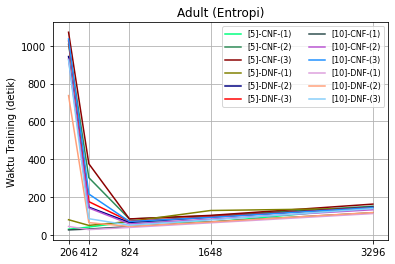

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 4))

plt.title("{} ({})".format(map_dataset[DATASET], map_model[MODEL]))
plt.ylabel(map_attr[ATTRIBUTE])
plt.xticks(n_partitions)

colors = [
    "#00ff7f",
    "#2e8b57",
    "#8b0000",
    "#808000",
    "#000080",
    "#ff0000",
    "#2f4f4f",
    "#ba55d3",
    "#1e90ff",
    "#dda0dd",
    "#ffa07a",
    "#87cefa"
]

id_c = 0
for lamda in [5, 10]:
    for rule_type in ['CNF', 'DNF']:
        for n_clause in [1, 2, 3]:
            d = dict(grouped[lamda][n_clause][rule_type])
            plt.plot(
                list(d.keys())[ZOOM_ID:],
                list(d.values())[ZOOM_ID:] if ATTRIBUTE != ' val_accuracy' else [u * 100 for u in list(d.values())],
                label="[{}]-{}-({})".format(lamda,rule_type, n_clause),
                color=colors[id_c]
            )
            id_c += 1
plt.grid(axis='both')
plt.legend(ncol=2, prop={'size': 8})
plt.savefig("./_plot/" + ATTRIBUTE.strip() + "/" + DATASET + "-" + map_model[MODEL].lower() + "-mini" + ".jpg", bbox_inches = 'tight')
plt.show()